<a href="https://colab.research.google.com/github/pratyushojha04/projects_on_EDA_ML/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# **Trying normal aproach just by python**

In [49]:
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

#from keras.utils.vis_utils import plot_model





In [50]:
a=pd.read_csv('/content/BANKNIFTY.csv')

In [51]:
a

,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0
...,...,...,...,...,...,...,...,...,...
94542,BANKNIFTY,2020/12/31,15:28,31236.2,31262.4,31232.3,31255.8,0,0
94543,BANKNIFTY,2020/12/31,15:29,31264.8,31267.4,31240.8,31251.6,0,0
94544,BANKNIFTY,2020/12/31,15:30,31255.6,31264.0,31230.6,31237.8,0,0
94545,BANKNIFTY,2020/12/31,15:31,31241.2,31241.2,31241.2,31241.2,0,0


In [52]:
a.tail(50)

,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
94497,BANKNIFTY,2020/12/31,14:43,31280.7,31293.3,31270.6,31290.8,0,0
94498,BANKNIFTY,2020/12/31,14:44,31292.8,31305.0,31289.6,31301.8,0,0
94499,BANKNIFTY,2020/12/31,14:45,31301.6,31313.3,31299.7,31313.3,0,0
94500,BANKNIFTY,2020/12/31,14:46,31312.4,31313.1,31286.3,31291.5,0,0
94501,BANKNIFTY,2020/12/31,14:47,31285.8,31297.0,31284.3,31288.9,0,0
94502,BANKNIFTY,2020/12/31,14:48,31290.3,31290.3,31274.8,31274.8,0,0
94503,BANKNIFTY,2020/12/31,14:49,31280.7,31280.8,31262.4,31274.4,0,0
94504,BANKNIFTY,2020/12/31,14:50,31272.4,31285.6,31268.8,31279.4,0,0
94505,BANKNIFTY,2020/12/31,14:51,31276.9,31288.6,31274.8,31283.7,0,0
94506,BANKNIFTY,2020/12/31,14:52,31286.8,31286.8,31277.1,31280.1,0,0


In [53]:
a.columns

Index(['BANKNIFTY', '2020/01/01', '09:16', '32242.6', '32295.8', '32220.9',
       '32292', '0', '0.1'],
      dtype='object')

In [54]:
a.rename(columns = {'BANKNIFTY':'BANKNIFTY','date':'date','open':'open','high':'high',
                    'low':'low','close':'close','volume':'volume',},
            inplace = True)

In [55]:
a.head()


,BANKNIFTY,2020/01/01,09:16,32242.6,32295.8,32220.9,32292,0,0.1
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0


In [56]:
a.columns = ['BANKNIFTY', 'date','time','open','high','low','close','Adj Close','volume']

In [57]:
a.head()

,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0


In [58]:
a.shape

(94547, 9)

In [59]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94547 entries, 0 to 94546
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BANKNIFTY  94547 non-null  object 
 1   date       94547 non-null  object 
 2   time       94547 non-null  object 
 3   open       94547 non-null  float64
 4   high       94547 non-null  float64
 5   low        94547 non-null  float64
 6   close      94547 non-null  float64
 7   Adj Close  94547 non-null  int64  
 8   volume     94547 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 6.5+ MB


In [60]:
a['open'].isnull().sum()
a['close'].isnull().sum()
a['high'].isnull().sum()
a['low'].isnull().sum()

0

In [61]:
a.describe()

,open,high,low,close,Adj Close,volume
count,94547.000000,94547.000000,94547.000000,94547.000000,94547.0,94547.0
mean,24553.761320,24566.471789,24540.781553,24553.637072,0.0,0.0
std,4518.247638,4516.042442,4520.435602,4518.284765,0.0,0.0
min,16135.200000,16183.700000,16116.300000,16139.500000,0.0,0.0
25%,21197.300000,21211.400000,21183.200000,21197.000000,0.0,0.0
50%,22848.900000,22858.000000,22839.300000,22849.300000,0.0,0.0
75%,29621.350000,29635.250000,29607.150000,29621.000000,0.0,0.0
max,32459.900000,32465.400000,32450.000000,32460.000000,0.0,0.0


<Axes: >

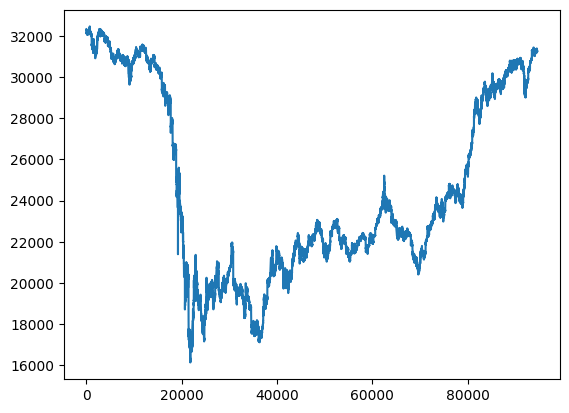

In [62]:
a['close'].plot()

<Axes: >

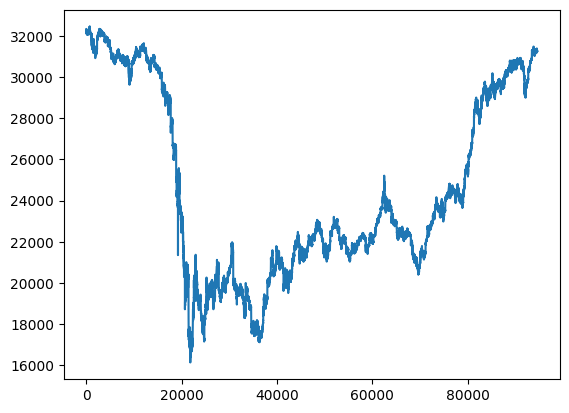

In [63]:
a['open'].plot()



<Axes: >

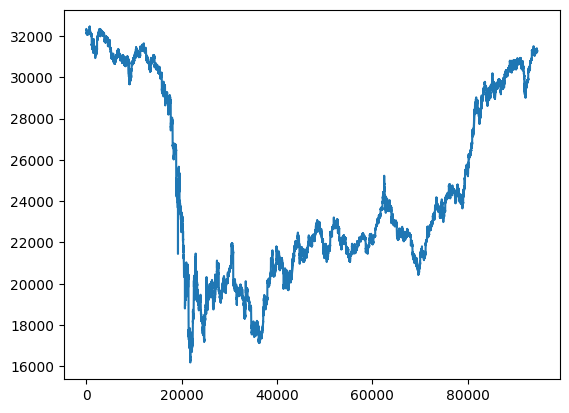

In [64]:
a['high'].plot()

<Axes: >

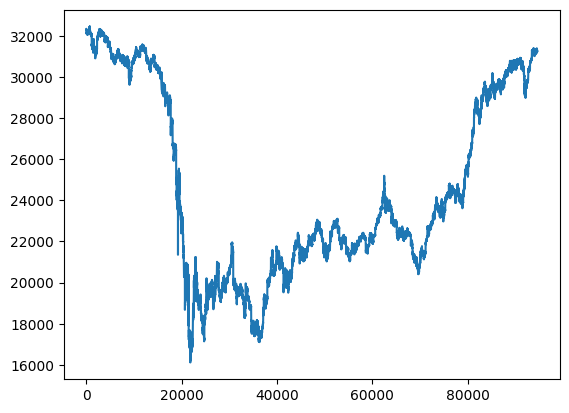

In [65]:
a['low'].plot()

In [66]:
df=a[:15]
df

,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0
5,BANKNIFTY,2020/01/01,09:22,32295.0,32299.4,32287.4,32288.9,0,0
6,BANKNIFTY,2020/01/01,09:23,32289.4,32297.6,32286.2,32295.6,0,0
7,BANKNIFTY,2020/01/01,09:24,32295.4,32313.3,32295.4,32310.2,0,0
8,BANKNIFTY,2020/01/01,09:25,32314.3,32318.4,32302.5,32309.6,0,0
9,BANKNIFTY,2020/01/01,09:26,32308.3,32313.7,32302.9,32313.7,0,0


In [67]:
df['stoploss'] = df['low'] + (0.005 * df['low'])
df


<ipython-input-67-7fd32be8d003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stoploss'] = df['low'] + (0.005 * df['low'])


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0,32445.3195
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0,32440.6965
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0,32432.0535
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0,32453.8620
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0,32449.6410
5,BANKNIFTY,2020/01/01,09:22,32295.0,32299.4,32287.4,32288.9,0,0,32448.8370
6,BANKNIFTY,2020/01/01,09:23,32289.4,32297.6,32286.2,32295.6,0,0,32447.6310
7,BANKNIFTY,2020/01/01,09:24,32295.4,32313.3,32295.4,32310.2,0,0,32456.8770
8,BANKNIFTY,2020/01/01,09:25,32314.3,32318.4,32302.5,32309.6,0,0,32464.0125
9,BANKNIFTY,2020/01/01,09:26,32308.3,32313.7,32302.9,32313.7,0,0,32464.4145


In [68]:
df['stopsell'] = df['high'] - (0.005 * df['high'])
df

<ipython-input-68-90695c555e69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopsell'] = df['high'] - (0.005 * df['high'])


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss,stopsell
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0,32445.3195,32141.7835
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0,32440.6965,32129.3460
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0,32432.0535,32134.8185
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0,32453.8620,32150.5395
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0,32449.6410,32141.8830
5,BANKNIFTY,2020/01/01,09:22,32295.0,32299.4,32287.4,32288.9,0,0,32448.8370,32137.9030
6,BANKNIFTY,2020/01/01,09:23,32289.4,32297.6,32286.2,32295.6,0,0,32447.6310,32136.1120
7,BANKNIFTY,2020/01/01,09:24,32295.4,32313.3,32295.4,32310.2,0,0,32456.8770,32151.7335
8,BANKNIFTY,2020/01/01,09:25,32314.3,32318.4,32302.5,32309.6,0,0,32464.0125,32156.8080
9,BANKNIFTY,2020/01/01,09:26,32308.3,32313.7,32302.9,32313.7,0,0,32464.4145,32152.1315


In [69]:
df['highlow']=df['stoploss']  + df['stopsell']
df

<ipython-input-69-66514f2ae318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highlow']=df['stoploss']  + df['stopsell']


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss,stopsell,highlow
0,BANKNIFTY,2020/01/01,09:17,32296.3,32303.3,32283.9,32286.4,0,0,32445.3195,32141.7835,64587.1030
1,BANKNIFTY,2020/01/01,09:18,32288.3,32290.8,32279.3,32279.6,0,0,32440.6965,32129.3460,64570.0425
2,BANKNIFTY,2020/01/01,09:19,32282.9,32296.3,32270.7,32292.6,0,0,32432.0535,32134.8185,64566.8720
3,BANKNIFTY,2020/01/01,09:20,32292.4,32312.1,32292.4,32300.9,0,0,32453.8620,32150.5395,64604.4015
4,BANKNIFTY,2020/01/01,09:21,32298.7,32303.4,32288.2,32293.5,0,0,32449.6410,32141.8830,64591.5240
5,BANKNIFTY,2020/01/01,09:22,32295.0,32299.4,32287.4,32288.9,0,0,32448.8370,32137.9030,64586.7400
6,BANKNIFTY,2020/01/01,09:23,32289.4,32297.6,32286.2,32295.6,0,0,32447.6310,32136.1120,64583.7430
7,BANKNIFTY,2020/01/01,09:24,32295.4,32313.3,32295.4,32310.2,0,0,32456.8770,32151.7335,64608.6105
8,BANKNIFTY,2020/01/01,09:25,32314.3,32318.4,32302.5,32309.6,0,0,32464.0125,32156.8080,64620.8205
9,BANKNIFTY,2020/01/01,09:26,32308.3,32313.7,32302.9,32313.7,0,0,32464.4145,32152.1315,64616.5460


In [70]:
max_value = df['highlow'].max()
max_value

64682.4465

In [71]:
min_value=df['highlow'].min()
min_value

64566.872

In [72]:
df9=a[15:377]
df9.head()
df9.tail()

,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume
372,BANKNIFTY,2020/01/01,15:29,32117.3,32131.1,32117.3,32126.3,0,0
373,BANKNIFTY,2020/01/01,15:30,32123.6,32135.6,32119.9,32128.9,0,0
374,BANKNIFTY,2020/01/01,15:31,32131.3,32131.3,32131.3,32131.3,0,0
375,BANKNIFTY,2020/01/01,15:33,32132.7,32132.7,32102.9,32102.9,0,0
376,BANKNIFTY,2020/01/02,09:16,32140.1,32203.8,32121.4,32197.3,0,0


In [73]:
df9['stoploss9'] = df9['low'] + (0.005 * df9['low'])
df9

<ipython-input-73-849d4de8937e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['stoploss9'] = df9['low'] + (0.005 * df9['low'])


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss9
15,BANKNIFTY,2020/01/01,09:32,32341.8,32348.0,32337.7,32339.6,0,0,32499.3885
16,BANKNIFTY,2020/01/01,09:33,32337.4,32342.8,32334.0,32334.0,0,0,32495.6700
17,BANKNIFTY,2020/01/01,09:34,32340.1,32340.1,32327.1,32331.4,0,0,32488.7355
18,BANKNIFTY,2020/01/01,09:35,32330.9,32332.4,32317.9,32324.4,0,0,32479.4895
19,BANKNIFTY,2020/01/01,09:36,32326.3,32329.3,32312.1,32313.8,0,0,32473.6605
...,...,...,...,...,...,...,...,...,...,...
372,BANKNIFTY,2020/01/01,15:29,32117.3,32131.1,32117.3,32126.3,0,0,32277.8865
373,BANKNIFTY,2020/01/01,15:30,32123.6,32135.6,32119.9,32128.9,0,0,32280.4995
374,BANKNIFTY,2020/01/01,15:31,32131.3,32131.3,32131.3,32131.3,0,0,32291.9565
375,BANKNIFTY,2020/01/01,15:33,32132.7,32132.7,32102.9,32102.9,0,0,32263.4145


In [74]:
df9['stopsell9'] = df9['high'] - (0.005 * df9['high'])
df9

<ipython-input-74-7dd4de240fba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['stopsell9'] = df9['high'] - (0.005 * df9['high'])


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss9,stopsell9
15,BANKNIFTY,2020/01/01,09:32,32341.8,32348.0,32337.7,32339.6,0,0,32499.3885,32186.2600
16,BANKNIFTY,2020/01/01,09:33,32337.4,32342.8,32334.0,32334.0,0,0,32495.6700,32181.0860
17,BANKNIFTY,2020/01/01,09:34,32340.1,32340.1,32327.1,32331.4,0,0,32488.7355,32178.3995
18,BANKNIFTY,2020/01/01,09:35,32330.9,32332.4,32317.9,32324.4,0,0,32479.4895,32170.7380
19,BANKNIFTY,2020/01/01,09:36,32326.3,32329.3,32312.1,32313.8,0,0,32473.6605,32167.6535
...,...,...,...,...,...,...,...,...,...,...,...
372,BANKNIFTY,2020/01/01,15:29,32117.3,32131.1,32117.3,32126.3,0,0,32277.8865,31970.4445
373,BANKNIFTY,2020/01/01,15:30,32123.6,32135.6,32119.9,32128.9,0,0,32280.4995,31974.9220
374,BANKNIFTY,2020/01/01,15:31,32131.3,32131.3,32131.3,32131.3,0,0,32291.9565,31970.6435
375,BANKNIFTY,2020/01/01,15:33,32132.7,32132.7,32102.9,32102.9,0,0,32263.4145,31972.0365


In [75]:
df9['highlow9']=df9['stoploss9']  + df9['stopsell9']
df9

<ipython-input-75-f0813c969ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['highlow9']=df9['stoploss9']  + df9['stopsell9']


,BANKNIFTY,date,time,open,high,low,close,Adj Close,volume,stoploss9,stopsell9,highlow9
15,BANKNIFTY,2020/01/01,09:32,32341.8,32348.0,32337.7,32339.6,0,0,32499.3885,32186.2600,64685.6485
16,BANKNIFTY,2020/01/01,09:33,32337.4,32342.8,32334.0,32334.0,0,0,32495.6700,32181.0860,64676.7560
17,BANKNIFTY,2020/01/01,09:34,32340.1,32340.1,32327.1,32331.4,0,0,32488.7355,32178.3995,64667.1350
18,BANKNIFTY,2020/01/01,09:35,32330.9,32332.4,32317.9,32324.4,0,0,32479.4895,32170.7380,64650.2275
19,BANKNIFTY,2020/01/01,09:36,32326.3,32329.3,32312.1,32313.8,0,0,32473.6605,32167.6535,64641.3140
...,...,...,...,...,...,...,...,...,...,...,...,...
372,BANKNIFTY,2020/01/01,15:29,32117.3,32131.1,32117.3,32126.3,0,0,32277.8865,31970.4445,64248.3310
373,BANKNIFTY,2020/01/01,15:30,32123.6,32135.6,32119.9,32128.9,0,0,32280.4995,31974.9220,64255.4215
374,BANKNIFTY,2020/01/01,15:31,32131.3,32131.3,32131.3,32131.3,0,0,32291.9565,31970.6435,64262.6000
375,BANKNIFTY,2020/01/01,15:33,32132.7,32132.7,32102.9,32102.9,0,0,32263.4145,31972.0365,64235.4510


In [85]:
temp=0
temp=0
count1=0
count2=0
for i in df9.highlow9:

  if (i<min_value):
    print("buy some stocks",i)
    count1+=1
    temp = i

  elif(i>max_value):
    print("sell the stock",i)
    count2+=1
    break

print(temp)
print(count1)
print(count2)



sell the stock 64685.648499999996
0
0
1


In [87]:
# result = df9.loc[df9['highlow9'] == temp, 'time'].values
# result

In [91]:
# temp1 = None
# temp2 = None

# for i in df9['time']:
#   if ((count1 != 0) and (i == count1)):
#     count+=1
#     print(count)
#     temp2 = i
#     break
#   elif ((count2 != 0) and (i == count2)) :
#     count3 += 1
#     print(count3)
#     temp1 = i
#     break

# print(temp1)
# print(temp2)
# print(count)




# temp1 = None
# temp2 = None
count = 0
count3 = 0
for i in df9['time']:
    if (count1 != 0) and (i == count1):
        count += 1
        print(count)
        temp1 = i
        break
for j in df9['time']:
  if (count2 != 0) and (j == count2):
    count3 += 1
    print(count3)
    temp2 = j


    break

# Print outside the loop to capture the final values
print("end the trade at", temp1)
print("end the trade at", temp2)






end the trade at 09:16
end the trade at 09:16


# **Trying machine learning predictive aproach if it works**

In [82]:

features = ['Open', 'High', 'Low', 'Volume']
output_var = pd.DataFrame(df['features'])

KeyError: ignored

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(output_var[output_var.columns])
feature_transform= pd.DataFrame(columns=output_var.columns, data=feature_transform, index=output_var.index)
feature_transform.head()



# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# df[df.columns] = mms.fit_transform(df)
# df.head()

In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
df.corr

<bound method DataFrame.corr of      BANKNIFTY        date   time     open     high      low    close  \
0    BANKNIFTY  2020/01/01  09:17  32296.3  32303.3  32283.9  32286.4   
1    BANKNIFTY  2020/01/01  09:18  32288.3  32290.8  32279.3  32279.6   
2    BANKNIFTY  2020/01/01  09:19  32282.9  32296.3  32270.7  32292.6   
3    BANKNIFTY  2020/01/01  09:20  32292.4  32312.1  32292.4  32300.9   
4    BANKNIFTY  2020/01/01  09:21  32298.7  32303.4  32288.2  32293.5   
..         ...         ...    ...      ...      ...      ...      ...   
372  BANKNIFTY  2020/01/01  15:29  32117.3  32131.1  32117.3  32126.3   
373  BANKNIFTY  2020/01/01  15:30  32123.6  32135.6  32119.9  32128.9   
374  BANKNIFTY  2020/01/01  15:31  32131.3  32131.3  32131.3  32131.3   
375  BANKNIFTY  2020/01/01  15:33  32132.7  32132.7  32102.9  32102.9   
376  BANKNIFTY  2020/01/02  09:16  32140.1  32203.8  32121.4  32197.3   

     Adj Close  volume  
0            0       0  
1            0       0  
2            0  

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
#plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
43/43 [==============================] - 3s 5ms/step - loss: 0.0000e+00
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 5/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 7/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 8/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 9/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 10/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 11/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 12/100
43/43 [==============================] - 0s 5ms/step - loss: 

In [ ]:
y_pred= lstm.predict(X_test)

2/2 [==============================] - 0s 5ms/step


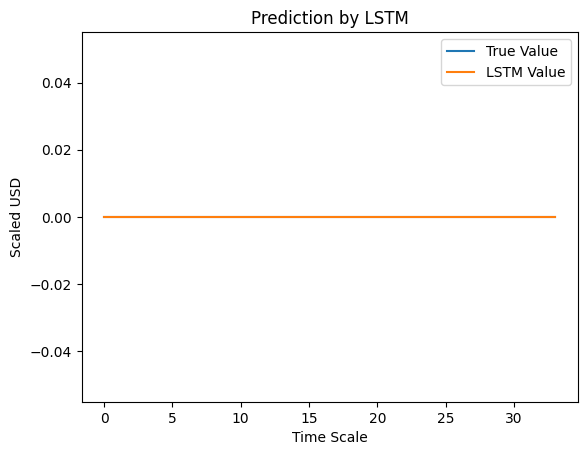

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()